In [33]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [34]:
os.chdir('D:\\Universita\\STatistica\\TIDE\\Python\\Projet\\Ale')
pd.set_option("display.max_rows", 16)
#dati=pd.read_excel("Data/base-cc-emploi-pop-active-2018.xlsx", sheet_name="ARM_2018",
#                   index_col=None, header=5)

#Paris=dati.loc[dati['REG']==11]

#com=pd.read_excel("Data/base-cc-emploi-pop-active-2018.xlsx", sheet_name="COM_2018",
#                   index_col=None, header=5)

#couronne = com.loc[(com['DEP']=="92")|(com['DEP']=="93")|(com['DEP']=="94")]

## Merging the 2 datasets.

In [35]:
#frame =[Paris,couronne]
#idf= pd.concat(frame)
#idf.to_excel('soceco2018.xlsx')

# Maintenant les statistiques descriptives.

In [36]:
idf= pd.read_excel('Donn/soceco2018.xlsx')

In [37]:
# Le taux de chomage 
# Tous 15-64
idf['TCHOM1564']= 100*idf['P18_CHOM1564'] / idf['P18_ACT1564']

In [38]:
# Part de cadres dans la population actif
idf['TCADACTOCC1564'] = 100*idf['C18_ACTOCC1564_CS3'] / idf['C18_ACTOCC1564']

In [39]:
# Le taux d'emploi 
# Tous 15-64
idf['TEMPL1564']= 100*idf['P18_ACTOCC1564'] / idf['P18_POP1564']

In [40]:
# Je viens de computer les statistiques pour les autres categories socioprofessionnelles.
# Part d'artisans, commercants et chefs d'entreprise dans la population active
idf['TACCACTOCC1564'] = 100*idf['C18_ACTOCC1564_CS2'] / idf['C18_ACTOCC1564']

In [41]:
idf.TACCACTOCC1564

0      9.325968
1      7.930588
2      8.073783
3      7.702209
4      6.384401
         ...   
138    6.388199
139    5.146818
140    3.976502
141    4.627134
142    5.341828
Name: TACCACTOCC1564, Length: 143, dtype: float64

In [42]:
# Part de professionnelles intermediares dans la population active occupée.
idf['TINTACTOCC1564'] = 100*idf['C18_ACTOCC1564_CS4'] / idf['C18_ACTOCC1564']

In [43]:
# Part d'employés dans la population active occupée.
idf['TEMPLACTOCC1564'] = 100*idf['C18_ACTOCC1564_CS5'] / idf['C18_ACTOCC1564']

In [44]:
# Part d'ouvriers dans la population active occupée.
idf['TOUVRACTOCC1564'] = 100*idf['C18_ACTOCC1564_CS6'] / idf['C18_ACTOCC1564']

### Pour une meilleure visualisation and cumputation des statistiques descriptives on selectionne que les variables qu'on veut observer.

In [45]:
idf= idf[['CODGEO','DEP','LIBGEO','TEMPL1564','TCHOM1564','TCADACTOCC1564','TACCACTOCC1564','TINTACTOCC1564','TEMPLACTOCC1564',
         'TOUVRACTOCC1564']]

In [46]:
idf.groupby('DEP')['TEMPL1564','TCHOM1564','TCADACTOCC1564','TACCACTOCC1564','TINTACTOCC1564','TEMPLACTOCC1564',
         'TOUVRACTOCC1564'].agg(['mean','std'])

C:\Users\alepi\AppData\Local\Temp/ipykernel_11468/2652382521.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  idf.groupby('DEP')['TEMPL1564','TCHOM1564','TCADACTOCC1564','TACCACTOCC1564','TINTACTOCC1564','TEMPLACTOCC1564',


TEMPL1564            TCHOM1564           TCADACTOCC1564             \
          mean       std       mean       std           mean        std   
DEP                                                                       
75   69.775901  3.676522  10.837886  1.873806      50.645329   5.466714   
92   70.011702  4.142292  10.494699  2.789023      42.474984  10.417114   
93   60.951233  6.188231  17.026243  4.352226      16.783035   8.192454   
94   67.324615  4.309913  11.696753  3.197326      26.750578  10.681859   

    TACCACTOCC1564           TINTACTOCC1564           TEMPLACTOCC1564  \
              mean       std           mean       std            mean   
DEP                                                                     
75        6.651460  2.116634      21.079147  2.651671       16.407134   
92        5.145532  1.631679      23.887756  2.372119       20.856988   
93        5.459853  1.044504      25.199963  4.065491       32.609001   
94        5.482998  1.732912      27.163699  2.787569       27.366869   

              TOUVRACTOCC1564            
          std            mean       std  
DEP                                      
75   3.121985        5.183124  1.735118  
92   5.980914        7.609906  4.074578  
93   5.513944       19.929247  6.359378  
94   5.913512       13.191754  5.784615

In [47]:
idf

,CODGEO,DEP,LIBGEO,TEMPL1564,TCHOM1564,TCADACTOCC1564,TACCACTOCC1564,TINTACTOCC1564,TEMPLACTOCC1564,TOUVRACTOCC1564
0,75101,75,Paris 1er Arrondissement,70.413247,10.646036,51.092708,9.325968,19.833096,15.335935,4.412292
1,75102,75,Paris 2e Arrondissement,76.804476,9.788824,53.833521,7.930588,19.793277,13.422703,4.991350
2,75103,75,Paris 3e Arrondissement,74.052105,9.963184,52.602729,8.073783,21.965144,13.855757,3.502585
3,75104,75,Paris 4e Arrondissement,70.599868,11.085392,50.923363,7.702209,22.055158,15.563020,3.692687
4,75105,75,Paris 5e Arrondissement,65.001268,9.145329,57.438181,6.384401,19.616881,13.042171,3.490575
...,...,...,...,...,...,...,...,...,...,...
138,94077,94,Villeneuve-le-Roi,66.159015,13.438588,14.890024,6.388199,25.646688,29.189644,23.805063
139,94078,94,Villeneuve-Saint-Georges,58.115872,17.791299,7.770066,5.146818,19.689060,38.592956,28.801101
140,94079,94,Villiers-sur-Marne,67.227995,9.086926,25.024190,3.976502,27.149780,28.009103,15.832402
141,94080,94,Vincennes,75.991430,8.562363,53.346740,4.627134,23.662141,14.014246,4.346060


# P.2. Les mappes

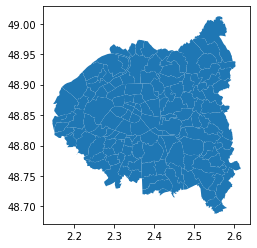

In [48]:
mapp="Donn/maps.shp"
mappe = gpd.read_file(mapp)
mappe.plot();

In [49]:
mappe

,index,n_sq_ar,c_ar,CODGEO,l_ar,l_aroff,n_sq_co,surface,perimetre,nom,wikipedia,surf_ha,geometry
0,0,750000016.0,16.0,75116,16Ã¨me Ardt,Passy,750001537.0,1.637254e+07,17416.109657,None,None,NaN,"POLYGON ((2.27427 48.87837, 2.27749 48.87796, ..."
1,1,750000019.0,19.0,75119,19Ã¨me Ardt,Buttes-Chaumont,750001537.0,6.792651e+06,11253.182479,None,None,NaN,"POLYGON ((2.38943 48.90122, 2.39014 48.90108, ..."
2,2,750000003.0,3.0,75103,3Ã¨me Ardt,Temple,750001537.0,1.170883e+06,4519.263648,None,None,NaN,"POLYGON ((2.36383 48.86750, 2.36389 48.86747, ..."
3,3,750000011.0,11.0,75111,11Ã¨me Ardt,Popincourt,750001537.0,3.665442e+06,8282.011886,None,None,NaN,"POLYGON ((2.39624 48.85415, 2.39708 48.85308, ..."
4,4,750000005.0,5.0,75105,5Ã¨me Ardt,PanthÃ©on,750001537.0,2.539375e+06,6239.195396,None,None,NaN,"POLYGON ((2.36443 48.84614, 2.36484 48.84584, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,32574,NaN,NaN,94019,None,None,NaN,NaN,NaN,Chennevières-sur-Marne,fr:Chennevières-sur-Marne,523.0,"POLYGON ((2.51681 48.78641, 2.51765 48.78662, ..."
139,32575,NaN,NaN,94060,None,None,NaN,NaN,NaN,La Queue-en-Brie,fr:La Queue-en-Brie,939.0,"POLYGON ((2.55528 48.79204, 2.57154 48.79891, ..."
140,32627,NaN,NaN,93057,None,None,NaN,NaN,NaN,Les Pavillons-sous-Bois,fr:Les Pavillons-sous-Bois,292.0,"POLYGON ((2.49018 48.90728, 2.49193 48.90755, ..."
141,32656,NaN,NaN,93061,None,None,NaN,NaN,NaN,Le Pré-Saint-Gervais,fr:Le Pré-Saint-Gervais,70.0,"POLYGON ((2.39891 48.88956, 2.39895 48.88956, ..."


In [50]:
merged = mappe.set_index('CODGEO').join(idf.set_index('CODGEO'))
merged

,index,n_sq_ar,c_ar,l_ar,l_aroff,n_sq_co,surface,perimetre,nom,wikipedia,...,geometry,DEP,LIBGEO,TEMPL1564,TCHOM1564,TCADACTOCC1564,TACCACTOCC1564,TINTACTOCC1564,TEMPLACTOCC1564,TOUVRACTOCC1564
CODGEO,,,,,,,,,,,,,,,,,,,,,
75116,0,750000016.0,16.0,16Ã¨me Ardt,Passy,750001537.0,1.637254e+07,17416.109657,None,None,...,"POLYGON ((2.27427 48.87837, 2.27749 48.87796, ...",75,Paris 16e Arrondissement,66.528314,9.535463,51.159271,9.558413,17.934424,16.952799,4.306666
75119,1,750000019.0,19.0,19Ã¨me Ardt,Buttes-Chaumont,750001537.0,6.792651e+06,11253.182479,None,None,...,"POLYGON ((2.38943 48.90122, 2.39014 48.90108, ...",75,Paris 19e Arrondissement,64.583459,15.946173,37.791645,4.704906,24.205096,23.971447,9.306708
75103,2,750000003.0,3.0,3Ã¨me Ardt,Temple,750001537.0,1.170883e+06,4519.263648,None,None,...,"POLYGON ((2.36383 48.86750, 2.36389 48.86747, ...",75,Paris 3e Arrondissement,74.052105,9.963184,52.602729,8.073783,21.965144,13.855757,3.502585
75111,3,750000011.0,11.0,11Ã¨me Ardt,Popincourt,750001537.0,3.665442e+06,8282.011886,None,None,...,"POLYGON ((2.39624 48.85415, 2.39708 48.85308, ...",75,Paris 11e Arrondissement,73.673829,11.098717,51.729993,4.910067,23.675793,15.009176,4.664084
75105,4,750000005.0,5.0,5Ã¨me Ardt,PanthÃ©on,750001537.0,2.539375e+06,6239.195396,None,None,...,"POLYGON ((2.36443 48.84614, 2.36484 48.84584, ...",75,Paris 5e Arrondissement,65.001268,9.145329,57.438181,6.384401,19.616881,13.042171,3.490575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94019,32574,NaN,NaN,None,None,NaN,NaN,NaN,Chennevières-sur-Marne,fr:Chennevières-sur-Marne,...,"POLYGON ((2.51681 48.78641, 2.51765 48.78662, ...",94,Chennevières-sur-Marne,65.728780,13.711063,18.461055,6.141495,26.603372,30.798664,17.995415
94060,32575,NaN,NaN,None,None,NaN,NaN,NaN,La Queue-en-Brie,fr:La Queue-en-Brie,...,"POLYGON ((2.55528 48.79204, 2.57154 48.79891, ...",94,La Queue-en-Brie,69.313243,9.825762,17.029839,5.243745,28.136978,33.349589,16.239849
93057,32627,NaN,NaN,None,None,NaN,NaN,NaN,Les Pavillons-sous-Bois,fr:Les Pavillons-sous-Bois,...,"POLYGON ((2.49018 48.90728, 2.49193 48.90755, ...",93,Les Pavillons-sous-Bois,66.471038,13.721235,17.370384,7.455122,28.565122,28.629336,17.980035


### Pour les contours.

In [51]:
regions = merged.dissolve(by='DEP')
regions

,geometry,index,n_sq_ar,c_ar,l_ar,l_aroff,n_sq_co,surface,perimetre,nom,wikipedia,surf_ha,LIBGEO,TEMPL1564,TCHOM1564,TCADACTOCC1564,TACCACTOCC1564,TINTACTOCC1564,TEMPLACTOCC1564,TOUVRACTOCC1564
DEP,,,,,,,,,,,,,,,,,,,,
75,"POLYGON ((2.34308 48.81609, 2.34171 48.81634, ...",0,750000016.0,16.0,16Ã¨me Ardt,Passy,750001537.0,1.637254e+07,17416.109657,None,None,NaN,Paris 16e Arrondissement,66.528314,9.535463,51.159271,9.558413,17.934424,16.952799,4.306666
92,"POLYGON ((2.22865 48.77451, 2.22862 48.77467, ...",322,NaN,NaN,None,None,NaN,NaN,NaN,Antony,fr:Antony,955.0,Antony,71.321293,8.782513,48.471890,3.979032,23.822231,17.292776,6.397908
93,"POLYGON ((2.48163 48.86141, 2.48157 48.86133, ...",26,NaN,NaN,None,None,NaN,NaN,NaN,Noisy-le-Sec,fr:Noisy-le-Sec,504.0,Noisy-le-Sec,59.287998,17.678893,14.208325,5.348661,23.382984,36.724473,20.315324
94,"POLYGON ((2.43863 48.72498, 2.43787 48.72481, ...",311,NaN,NaN,None,None,NaN,NaN,NaN,Sucy-en-Brie,fr:Sucy-en-Brie,1041.0,Sucy-en-Brie,67.234342,9.927839,29.663797,5.770038,27.558399,24.725220,12.282545


In [52]:
print(merged['TCHOM1564'].min() ,merged['TCHOM1564'].max())

7.254561251086012 25.252771223072987


In [53]:
merged.loc[(merged['TCHOM1564']==7.254561251086012)]

,index,n_sq_ar,c_ar,l_ar,l_aroff,n_sq_co,surface,perimetre,nom,wikipedia,...,geometry,DEP,LIBGEO,TEMPL1564,TCHOM1564,TCADACTOCC1564,TACCACTOCC1564,TINTACTOCC1564,TEMPLACTOCC1564,TOUVRACTOCC1564
CODGEO,,,,,,,,,,,,,,,,,,,,,
94053,1857,NaN,NaN,None,None,NaN,NaN,NaN,Noiseau,fr:Noiseau,...,"POLYGON ((2.53551 48.77704, 2.53606 48.77707, ...",94,Noiseau,71.333111,7.254561,23.419204,5.854801,32.318501,25.058548,12.64637


In [54]:
merged.loc[(merged['TCHOM1564']==25.252771223072987)]

,index,n_sq_ar,c_ar,l_ar,l_aroff,n_sq_co,surface,perimetre,nom,wikipedia,...,geometry,DEP,LIBGEO,TEMPL1564,TCHOM1564,TCADACTOCC1564,TACCACTOCC1564,TINTACTOCC1564,TEMPLACTOCC1564,TOUVRACTOCC1564
CODGEO,,,,,,,,,,,,,,,,,,,,,
93027,3923,NaN,NaN,None,None,NaN,NaN,NaN,La Courneuve,fr:La Courneuve,...,"POLYGON ((2.37467 48.92386, 2.37612 48.92455, ...",93,La Courneuve,52.265582,25.252771,7.040798,6.783255,16.846004,37.904626,31.361596


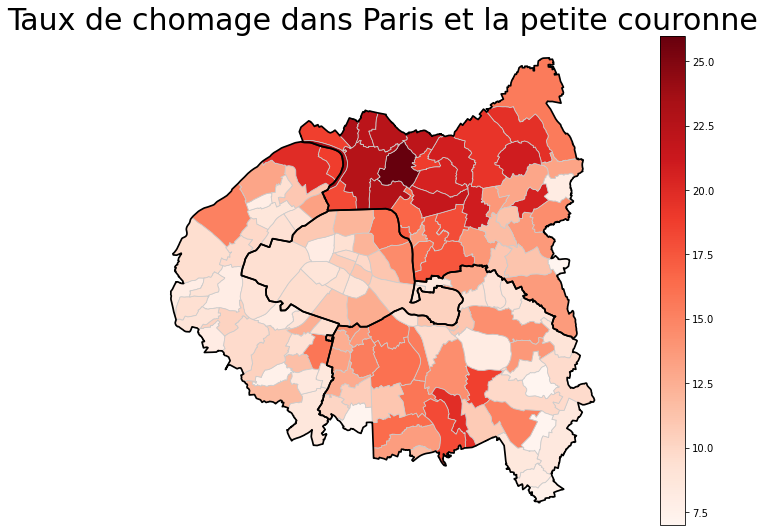

<Figure size 1152x648 with 0 Axes>

In [55]:
variable = 'TCHOM1564'
vmin, vmax = 7, 26
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Taux de chomage dans Paris et la petite couronne", fontsize=30)
plt.show();

## Pour le taux d'emploi 

In [56]:
print(merged['TEMPL1564'].min() ,merged['TEMPL1564'].max())

48.44647111285818 76.80447625238756


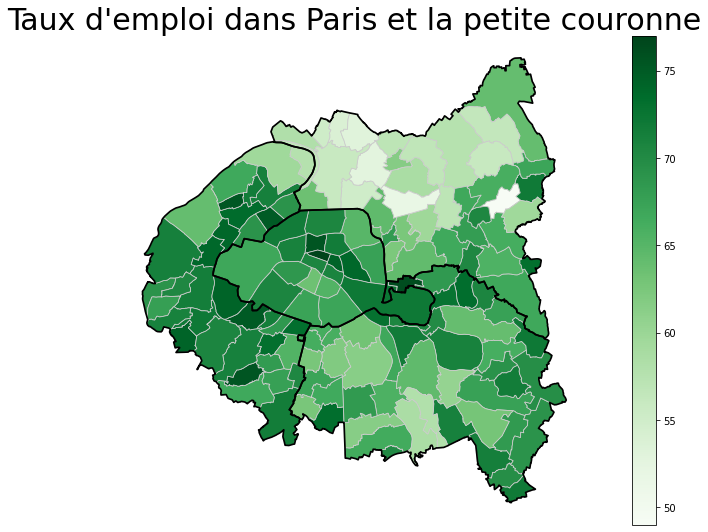

<Figure size 1152x648 with 0 Axes>

In [57]:
variable = 'TEMPL1564'
vmin, vmax = 49, 77
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Taux d'emploi dans Paris et la petite couronne", fontsize=30)
plt.show();

## Pour le taux de cadres. 

In [58]:
print(merged['TCADACTOCC1564'].min() ,merged['TCADACTOCC1564'].max())

5.455025377863021 57.483559741988906


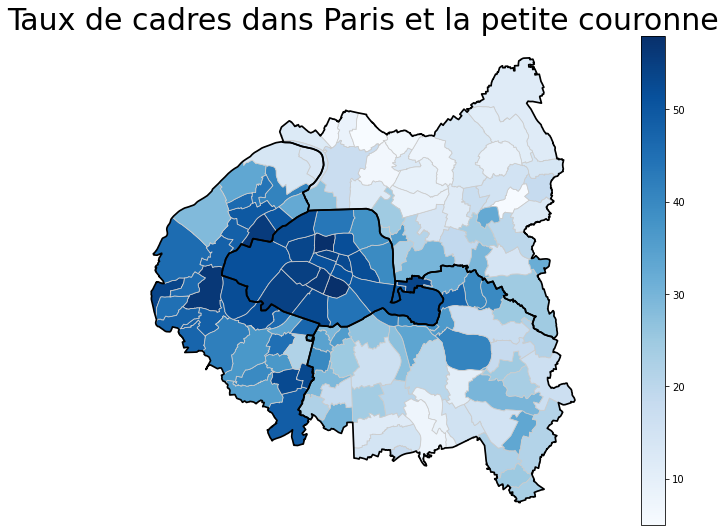

<Figure size 1152x648 with 0 Axes>

In [59]:
variable = 'TCADACTOCC1564'
vmin, vmax = 5, 58
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Taux de cadres dans Paris et la petite couronne", fontsize=30)
plt.show();

## Pour les ouvriers et les employés

In [60]:
merged['TLOWC1564'] = merged['TEMPLACTOCC1564'] + merged['TOUVRACTOCC1564'] 

In [61]:
print(merged['TLOWC1564'].min() ,merged['TLOWC1564'].max())

15.928683334668271 69.26622204330587


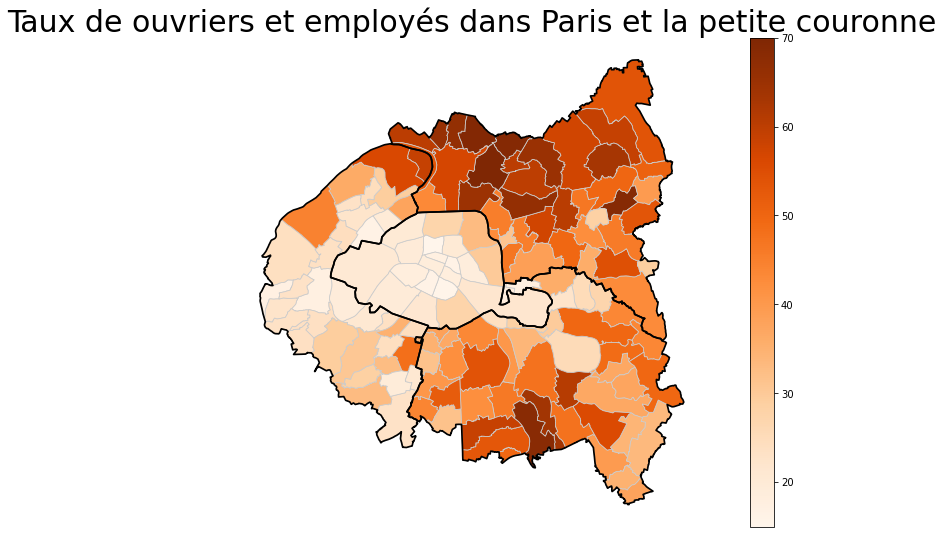

<Figure size 1152x648 with 0 Axes>

In [62]:
variable = 'TLOWC1564'
vmin, vmax = 15, 70
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Taux de ouvriers et employés dans Paris et la petite couronne", fontsize=30)
plt.show();

# P.3. Variations entre 2013 et 2018.

In [63]:
#donn=pd.read_excel("Data/base-cc-emploi-pop-active-2018.xlsx", sheet_name="ARM_2013",
#                  index_col=None, header=5)

#Paris13=donn.loc[donn['REG']==11]

#commu=pd.read_excel("Data/base-cc-emploi-pop-active-2018.xlsx", sheet_name="COM_2013",
#                   index_col=None, header=5)

#couronne13 = commu.loc[(commu['DEP']=="92")|(commu['DEP']=="93")|(commu['DEP']=="94")]
#frame13 =[Paris13,couronne13]
#petite13= pd.concat(frame13)
#petite13.to_excel('soceco2013.xlsx')

## Toutes les statistiques pour l'année 2013

In [64]:
petite13= pd.read_excel('Donn/soceco2013.xlsx')

In [65]:
petite13['TCHOM1564']= 100*petite13['P13_CHOM1564'] / petite13['P13_ACT1564']

In [66]:
petite13['TCADACTOCC1564'] = 100*petite13['C13_ACTOCC1564_CS3'] / petite13['C13_ACTOCC1564']

In [67]:
petite13['TEMPL1564']= 100*petite13['P13_ACTOCC1564'] / petite13['P13_POP1564']

In [68]:
petite13['TACCACTOCC1564'] = 100*petite13['C13_ACTOCC1564_CS2'] / petite13['C13_ACTOCC1564']

In [69]:
petite13['TINTACTOCC1564'] = 100*petite13['C13_ACTOCC1564_CS4'] / petite13['C13_ACTOCC1564']

In [70]:
petite13['TEMPLACTOCC1564'] = 100*petite13['C13_ACTOCC1564_CS5'] / petite13['C13_ACTOCC1564']

In [71]:
petite13['TOUVRACTOCC1564'] = 100*petite13['C13_ACTOCC1564_CS6'] / petite13['C13_ACTOCC1564']

In [72]:
petite13= petite13[['CODGEO','DEP','LIBGEO','TEMPL1564','TCHOM1564','TCADACTOCC1564','TACCACTOCC1564','TINTACTOCC1564','TEMPLACTOCC1564',
         'TOUVRACTOCC1564']]

In [73]:
diff = pd.merge(merged, petite13, on="CODGEO", suffixes=["", "_13"])

In [74]:
diff

,CODGEO,index,n_sq_ar,c_ar,l_ar,l_aroff,n_sq_co,surface,perimetre,nom,...,TLOWC1564,DEP_13,LIBGEO_13,TEMPL1564_13,TCHOM1564_13,TCADACTOCC1564_13,TACCACTOCC1564_13,TINTACTOCC1564_13,TEMPLACTOCC1564_13,TOUVRACTOCC1564_13
0,75116,0,750000016.0,16.0,16Ã¨me Ardt,Passy,750001537.0,1.637254e+07,17416.109657,None,...,21.259465,75,Paris 16e Arrondissement,64.456381,10.169877,50.467371,9.317838,18.143673,17.809316,4.166839
1,75119,1,750000019.0,19.0,19Ã¨me Ardt,Buttes-Chaumont,750001537.0,6.792651e+06,11253.182479,None,...,33.278155,75,Paris 19e Arrondissement,63.015088,16.386648,33.460098,4.745163,25.511605,25.624851,10.656781
2,75103,2,750000003.0,3.0,3Ã¨me Ardt,Temple,750001537.0,1.170883e+06,4519.263648,None,...,17.358343,75,Paris 3e Arrondissement,72.145346,11.013255,54.169071,6.656376,21.023431,13.803018,4.329073
3,75111,3,750000011.0,11.0,11Ã¨me Ardt,Popincourt,750001537.0,3.665442e+06,8282.011886,None,...,19.673260,75,Paris 11e Arrondissement,71.444754,11.707917,48.854335,4.355555,24.600967,16.474623,5.684648
4,75105,4,750000005.0,5.0,5Ã¨me Ardt,PanthÃ©on,750001537.0,2.539375e+06,6239.195396,None,...,16.532746,75,Paris 5e Arrondissement,64.387142,10.051595,55.969849,5.251104,21.310709,13.782804,3.663821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,94019,32574,NaN,NaN,None,None,NaN,NaN,NaN,Chennevières-sur-Marne,...,48.794079,94,Chennevières-sur-Marne,66.180982,13.065031,19.233246,5.831275,27.696235,29.913837,17.325407
139,94060,32575,NaN,NaN,None,None,NaN,NaN,NaN,La Queue-en-Brie,...,49.589438,94,La Queue-en-Brie,67.225046,10.725155,18.035203,4.431712,30.217137,30.554988,16.700567
140,93057,32627,NaN,NaN,None,None,NaN,NaN,NaN,Les Pavillons-sous-Bois,...,46.609372,93,Les Pavillons-sous-Bois,66.952538,11.667002,15.948662,5.668733,28.535350,31.639337,18.207918
141,93061,32656,NaN,NaN,None,None,NaN,NaN,NaN,Le Pré-Saint-Gervais,...,42.728978,93,Le Pré-Saint-Gervais,64.672613,17.529767,22.347707,4.746441,28.506570,30.206467,14.192815


## Les differences.

In [75]:
diff['DCHOM1564']= diff['TCHOM1564'] - diff['TCHOM1564_13']

In [76]:
diff['DCHOM1564'].mean()

-0.13425450391827104

In [77]:
diff['DEMPL1564']= diff['TEMPL1564'] - diff['TEMPL1564_13']

In [78]:
diff['DCADACTOCC1564']= diff['TCADACTOCC1564'] - diff['TCADACTOCC1564_13']

In [79]:
diff['TLOWC1564_13'] = diff['TEMPLACTOCC1564_13'] + diff['TOUVRACTOCC1564_13'] 
diff['DLOWC1564']= diff['TLOWC1564'] - diff['TLOWC1564_13']

In [80]:
diff.groupby('DEP')['DEMPL1564','DCHOM1564','DCADACTOCC1564','DLOWC1564'].agg(['mean','min','max'])

C:\Users\alepi\AppData\Local\Temp/ipykernel_11468/2586708715.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  diff.groupby('DEP')['DEMPL1564','DCHOM1564','DCADACTOCC1564','DLOWC1564'].agg(['mean','min','max'])


DEMPL1564                     DCHOM1564                      \
         mean       min       max      mean       min       max   
DEP                                                               
75   1.209011 -2.071949  2.848505 -0.372220 -1.600898  0.974256   
92   0.443935 -2.401244  3.147850  0.111595 -1.142257  2.142242   
93  -0.009208 -5.384821  3.832115 -0.424969 -4.307661  3.872316   
94   0.266966 -3.798790  2.931972  0.026114 -2.012195  3.064540   

    DCADACTOCC1564                     DLOWC1564                      
              mean       min       max      mean       min       max  
DEP                                                                   
75        1.760226 -2.867539  4.331547 -1.836693 -3.233195  0.203193  
92        2.564636 -4.632469  6.108746 -2.227825 -4.796955  4.380023  
93        1.418344 -2.950844  7.788314 -1.457430 -6.275259  5.132608  
94        1.786329 -7.286330  7.879031 -1.444250 -8.099657  7.003355

## On va voir les differences. 

In [81]:
print(diff['DCHOM1564'].min() ,diff['DCHOM1564'].max())

-4.3076607418803725 3.8723161646246744


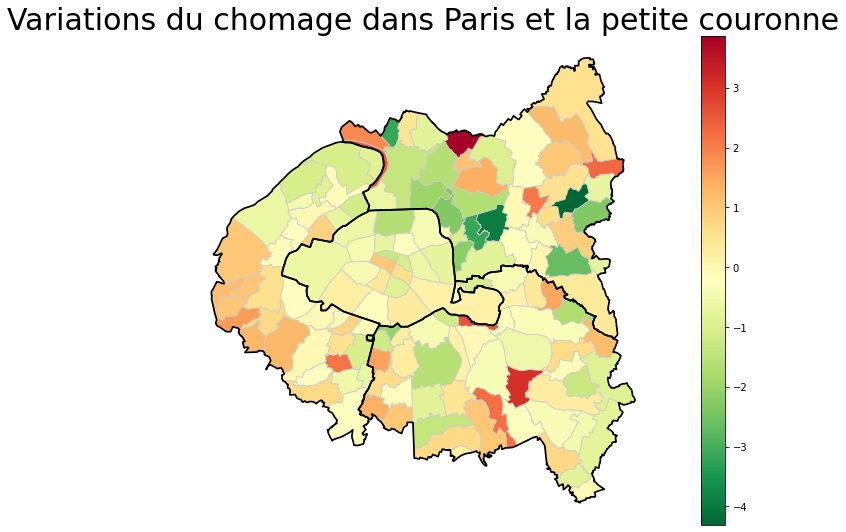

<Figure size 1152x648 with 0 Axes>

In [82]:
variable = 'DCHOM1564'
vmin, vmax = -4.307660741880383, 3.8723161646246744
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
diff.plot(column=variable, cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Variations du chomage dans Paris et la petite couronne", fontsize=30)
plt.show();

### Pour le variations du taux d'emploi

In [83]:
print(diff['DEMPL1564'].min() ,diff['DEMPL1564'].max())

-5.384820734847764 3.832114628265302


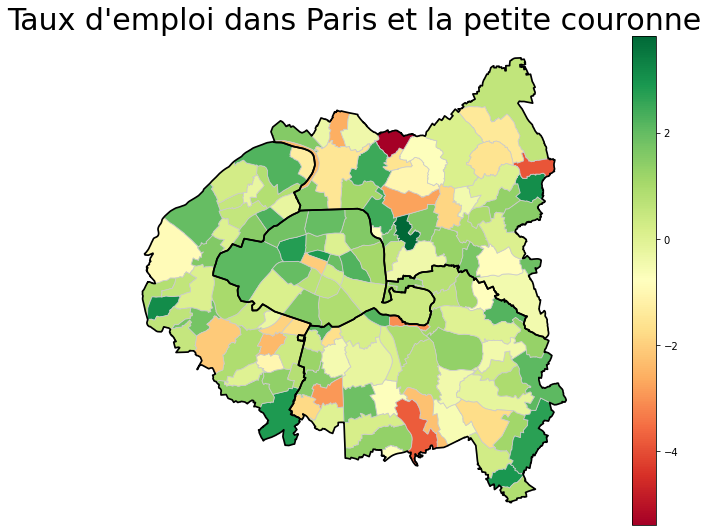

<Figure size 1152x648 with 0 Axes>

In [84]:
variable = 'DEMPL1564'
vmin, vmax = -5.384820734847764, 3.832114628265302
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
diff.plot(column=variable, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Taux d'emploi dans Paris et la petite couronne", fontsize=30)
plt.show();

### Pour le taux de cadres. 

In [85]:
print(diff['DCADACTOCC1564'].min() ,diff['DCADACTOCC1564'].max())

-7.286329872764281 7.879031168948803


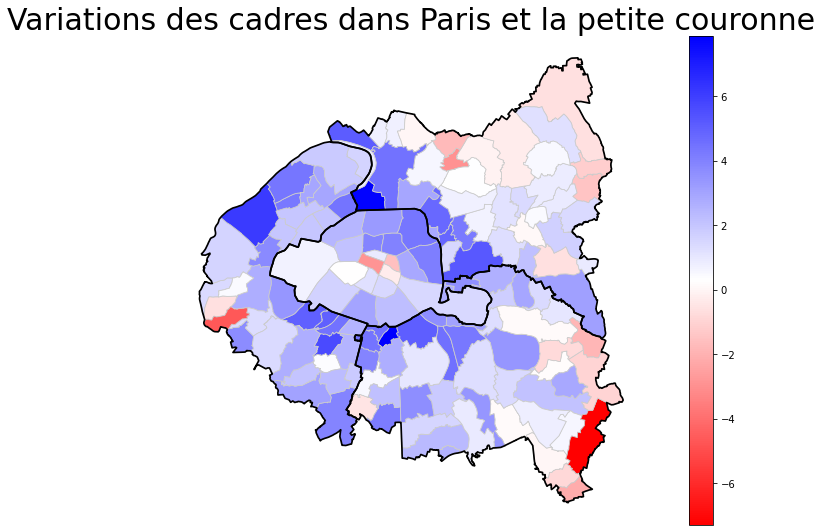

<Figure size 1152x648 with 0 Axes>

In [86]:
variable = 'DCADACTOCC1564'
vmin, vmax = -7.28632987276427, 7.879031168948803
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='bwr_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
diff.plot(column=variable, cmap='bwr_r', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Variations des cadres dans Paris et la petite couronne", fontsize=30)
plt.show();

### Pour les ouvriers et employés

In [87]:
print(diff['DLOWC1564'].min() ,diff['DLOWC1564'].max())

-8.099657496229128 7.003354567955029


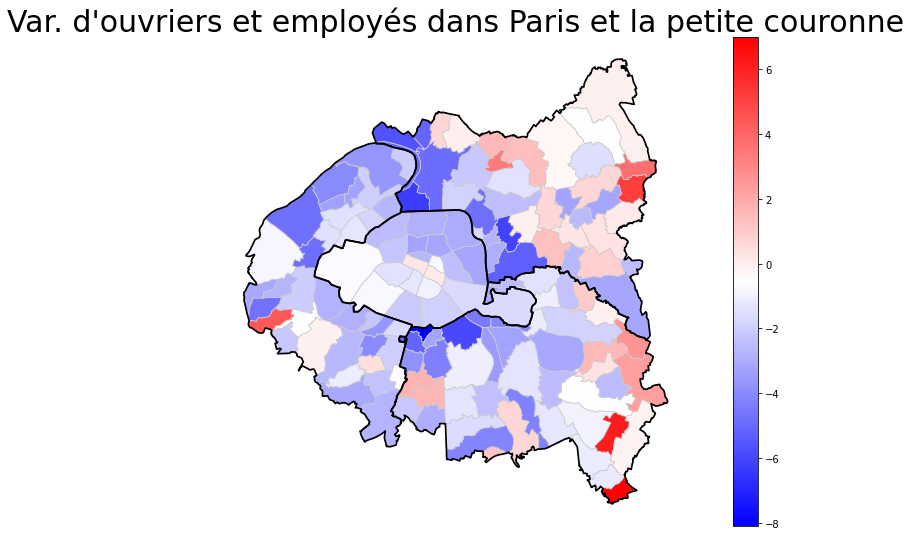

<Figure size 1152x648 with 0 Axes>

In [88]:
variable = 'DLOWC1564'
vmin, vmax = -8.099657496229142, 7.003354567955018
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='bwr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
diff.plot(column=variable, cmap='bwr', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Var. d'ouvriers et employés dans Paris et la petite couronne", fontsize=30)
plt.show();

In [90]:
regions['centroid'] = regions['geometry'].centroid

C:\Users\alepi\AppData\Local\Temp/ipykernel_11468/4249065017.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  regions['centroid'] = regions['geometry'].centroid


(2.1222041449999995, 2.6392713549999987, 48.67140341977379, 49.02856637968522)

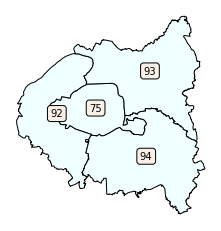

In [91]:
fig, ax = plt.subplots(1)
regions.plot(color='azure', edgecolor='black', ax=ax)
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in regions.iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[0],
            horizontalalignment='center',
            fontsize=10,
            bbox=props)
ax.axis('off')

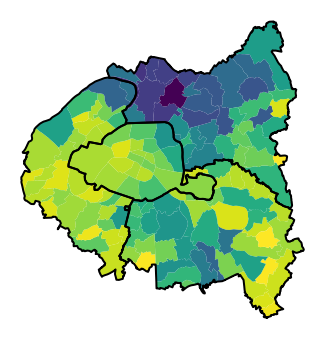

In [92]:
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='TCHOM1564', ax=ax, cmap='viridis_r')
regions.plot(color='None', edgecolor='black', linewidth=2, ax=ax)
ax.axis('off');